In [28]:
import pandas as pd
import numpy as np
from datetime import datetime, time, timedelta
from itertools import combinations 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
prices = pd.read_csv('datasets/index_ohlcv.csv')

In [30]:
indices = set(prices['index-name'].tolist())
index_dict = {}
for ind in indices:
    ind_df = prices[prices['index-name'] == ind].reset_index(drop=True)
    index_dict[ind] = ind_df

In [31]:
index_comb = list(combinations(indices, 2))

In [32]:
def plot_scatter(index_comb, index_dict, window=20):
    max_rows, max_cols = 7, 4
    fig, axes = plt.subplots(max_rows, max_cols, figsize=(40,40))
    plt.subplots_adjust(hspace=0.7, wspace=0.3)
    row, col = 0, 0
    for ic in index_comb:
        df1 = index_dict[ic[0]]
        df2 = index_dict[ic[1]]
        ret1 = df1['Adj Close']/df1['Adj Close'].shift(1) - 1
        ret2 = df2['Adj Close']/df2['Adj Close'].shift(1) - 1
        ret1, ret2 = ret1.dropna(axis=0, how='any'), ret2.dropna(axis=0, how='any')
        ret_df = pd.DataFrame({ic[0]:ret1, ic[1]:ret2})
        ret_df.plot.scatter(x=ic[0], y=ic[1], ax=axes[row][col], title='Scatter Plot:' + ic[1] + ' vs ' + ic[0], grid=True)
        if col < (max_cols-1):
            col += 1
        else:
            row += 1
            col = 0     

In [33]:
def plot_scatter_conditional(index_comb, index_dict, window=20, log_plot='one'):
    max_rows, max_cols = 7, 4
    fig, axes = plt.subplots(max_rows, max_cols, figsize=(40,40))
    plt.subplots_adjust(hspace=0.7, wspace=0.3)
    row, col = 0, 0
    for ic in index_comb:
        df1 = index_dict[ic[0]]
        df2 = index_dict[ic[1]]
        ret1 = df1['Adj Close']/df1['Adj Close'].shift(1) - 1
        ret2 = df2['Adj Close']/df2['Adj Close'].shift(1) - 1
        ret1, ret2 = ret1.dropna(axis=0, how='any'), ret2.dropna(axis=0, how='any')
        if log_plot == 'one':
            if ret1.std() > ret2.std():
                ret1 = np.log(ret1)
            else:
                ret2 = np.log(ret2)
        elif log_plot == 'two':
            ret1, ret2 = np.log(ret1), np.log(ret2)
            
        ret_df = pd.DataFrame({ic[0]:ret1, ic[1]:ret2})
        ret_df.plot.scatter(x=ic[0], y=ic[1], ax=axes[row][col], title='Scatter Plot:' + ic[1] + ' vs ' + ic[0], grid=True)
        if col < (max_cols-1):
            col += 1
        else:
            row += 1
            col = 0     

In [34]:
def plot_corr(index_comb, index_dict, window=20):
    max_rows, max_cols = 7, 4
    fig, axes = plt.subplots(max_rows, max_cols, figsize=(40,40))
    plt.subplots_adjust(hspace=0.7, wspace=0.3)
    row, col = 0, 0
    for ic in index_comb:
        df1 = index_dict[ic[0]]
        df2 = index_dict[ic[1]]
        df1['ret1'] = df1['Adj Close']/df1['Adj Close'].shift(1) - 1
        df2['ret2'] = df2['Adj Close']/df2['Adj Close'].shift(1) - 1
        ret1, ret2 = df1['ret1'].dropna(axis=0, how='any'), df2['ret2'].dropna(axis=0, how='any')
        ret_df = pd.DataFrame({ic[0]:ret1, ic[1]:ret2})
        corr_df = ret_df[ic[0]].rolling(window).corr(ret_df[ic[1]])
        corr_df.plot(ax=axes[row][col], title='Line Plot for Corr: ' + ic[1] + '-' + ic[0], grid=True)
        if col < (max_cols-1):
            col += 1
        else:
            row += 1
            col = 0     

In [36]:
windows=list(map(int, list(np.linspace(10,200, num=20))))

In [37]:
def plot_corr_stats(index_comb, index_dict, windows, param='mean'):
    max_rows, max_cols = 7, 4
    fig, axes = plt.subplots(max_rows, max_cols, figsize=(40,40))
    plt.subplots_adjust(hspace=0.7, wspace=0.3)
    row, col = 0, 0
    for ic in index_comb:
        df1 = index_dict[ic[0]]
        df2 = index_dict[ic[1]]
        df1['ret1'] = df1['Adj Close']/df1['Adj Close'].shift(1) - 1
        df2['ret2'] = df2['Adj Close']/df2['Adj Close'].shift(1) - 1
        ret1, ret2 = df1['ret1'].dropna(axis=0, how='any'), df2['ret2'].dropna(axis=0, how='any')
        ret_df = pd.DataFrame({ic[0]:ret1, ic[1]:ret2})
        
        corr_mean, corr_std = [], []
        for w in windows:
            corr_df = ret_df[ic[0]].rolling(w).corr(ret_df[ic[1]]).dropna()
            corr_mean.append(corr_df.mean())
            corr_std.append(corr_df.std())
            
        stats_df = pd.DataFrame({'window': windows, 'mean':corr_mean, 'std':corr_std})
        stats_df.plot(x='window', y=param, ax=axes[row][col], title='Line Plot for Corr-' + param + ': ' + ic[1] + '-' + ic[0], grid=True)
        
        if col < (max_cols-1):
            col += 1
        else:
            row += 1
            col = 0     

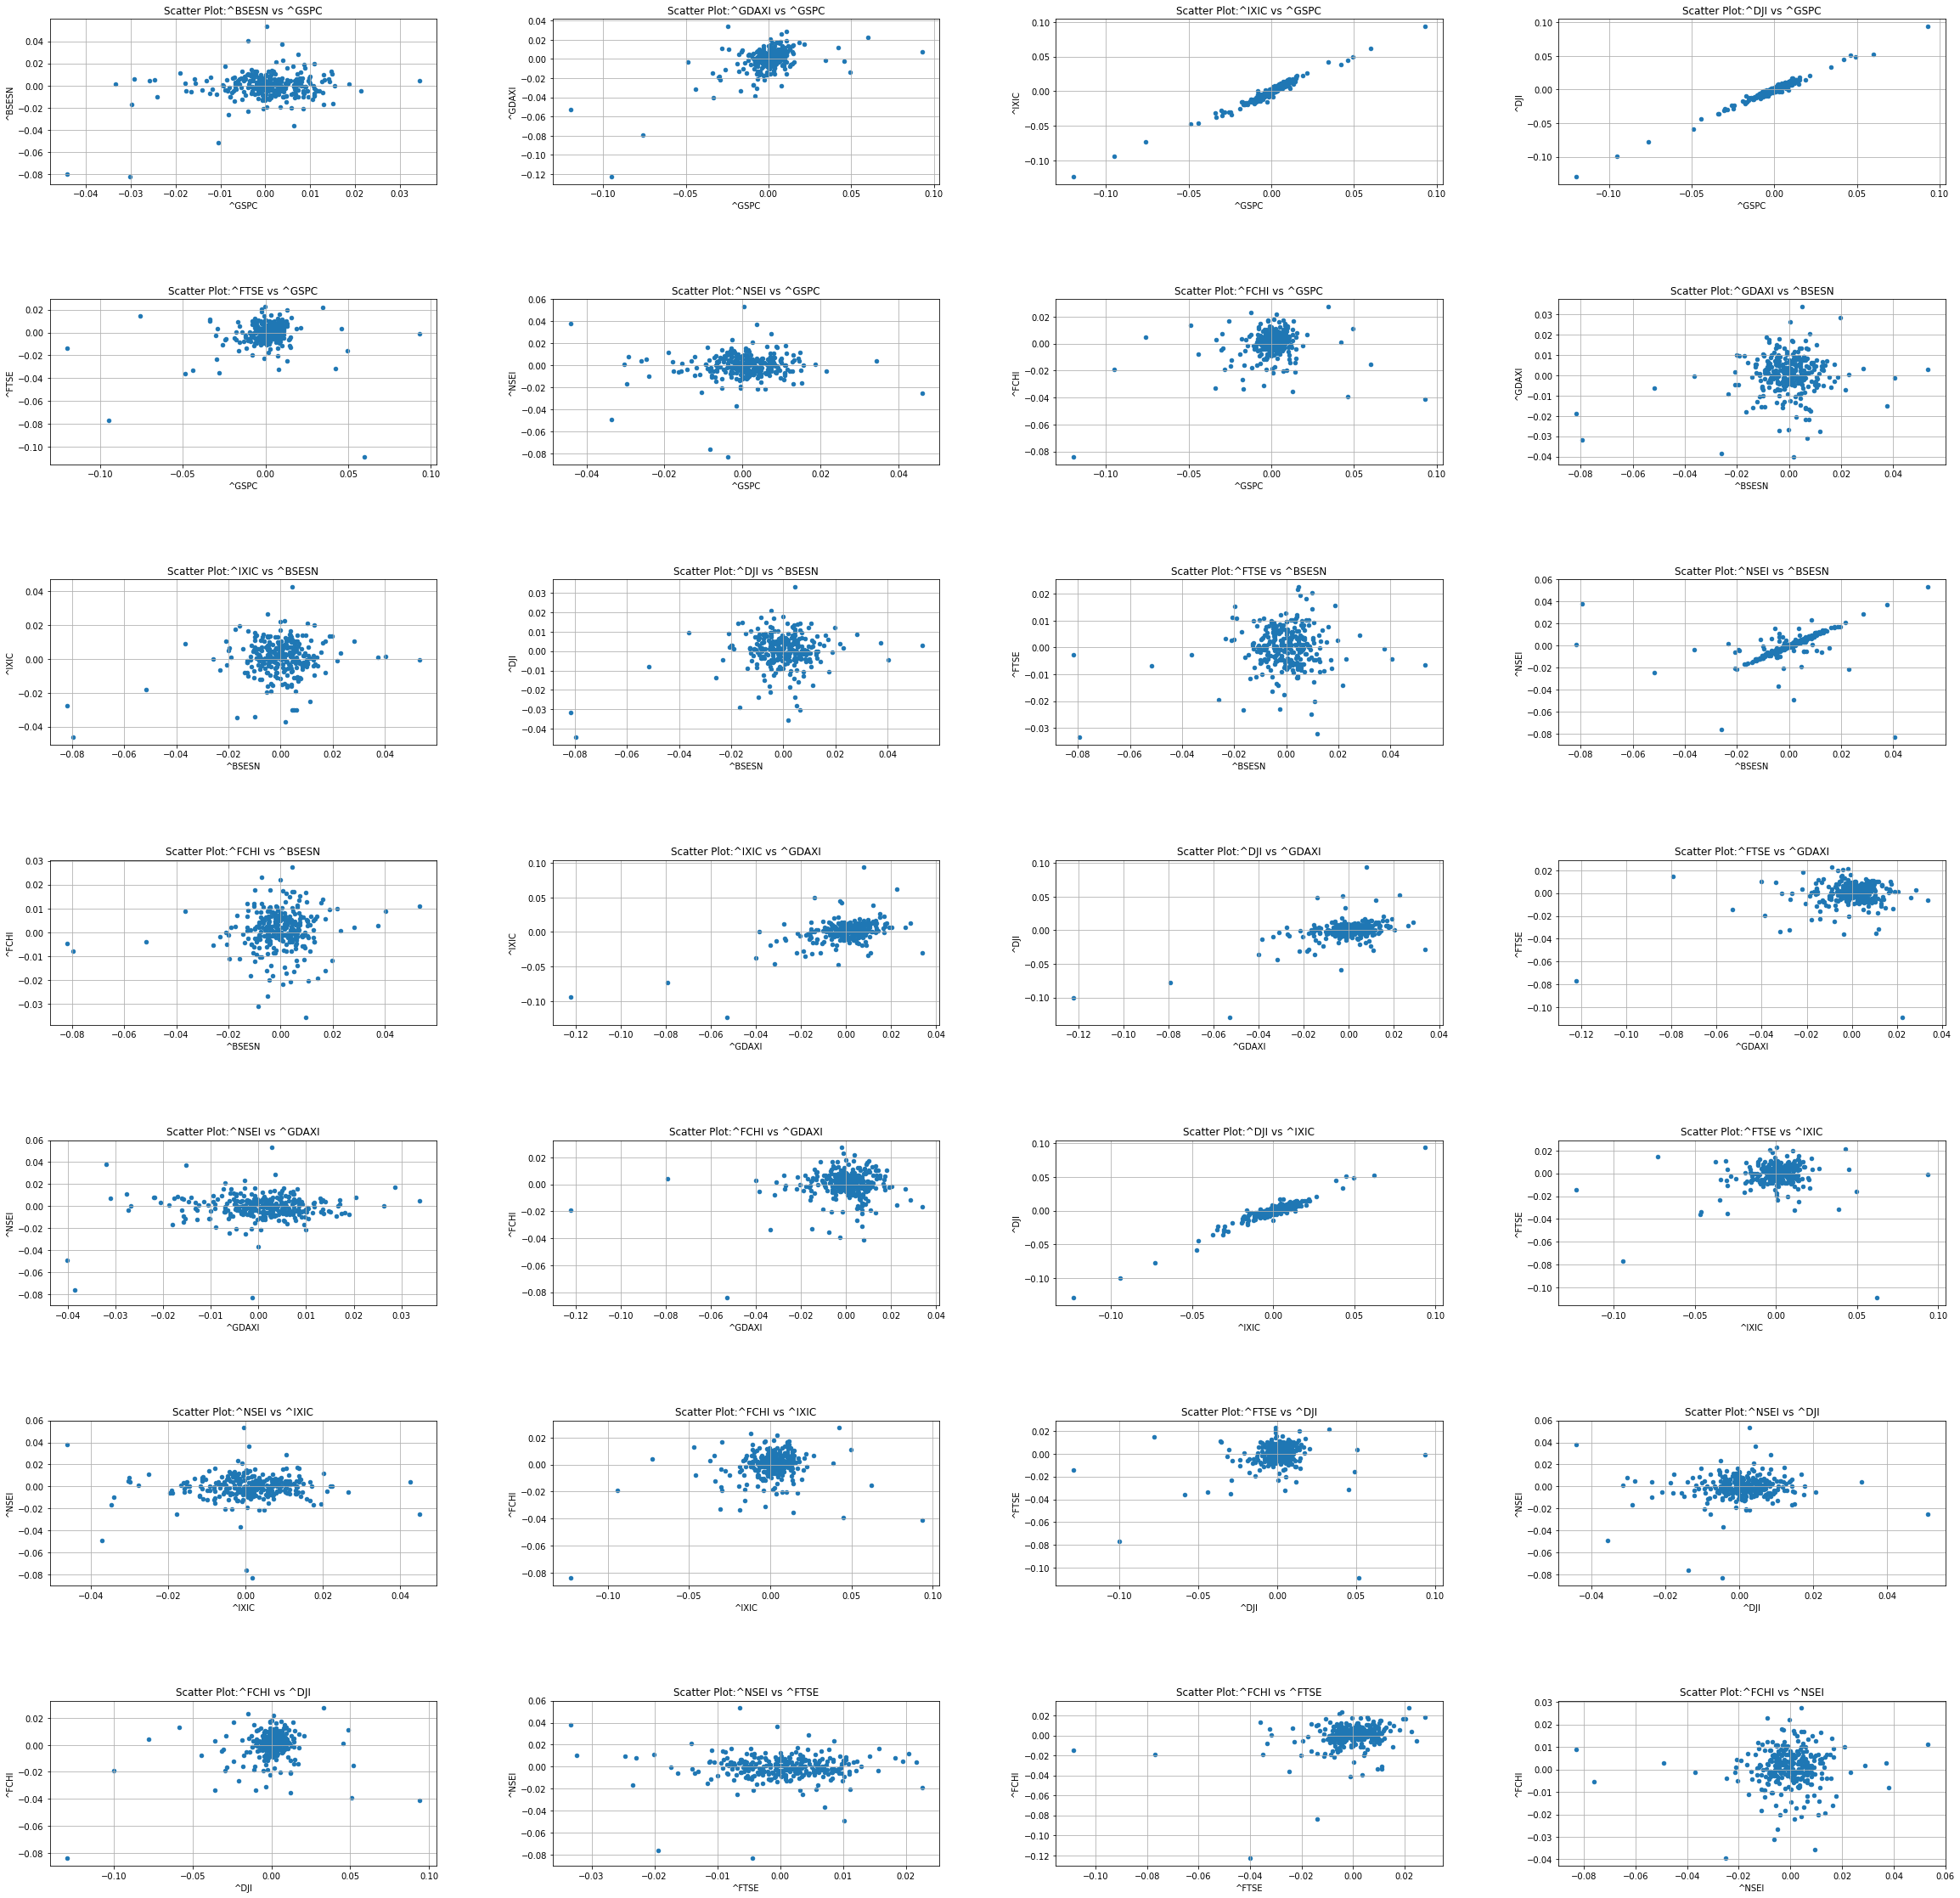

In [38]:
plot_scatter(index_comb, index_dict)

c:\python38\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\python38\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


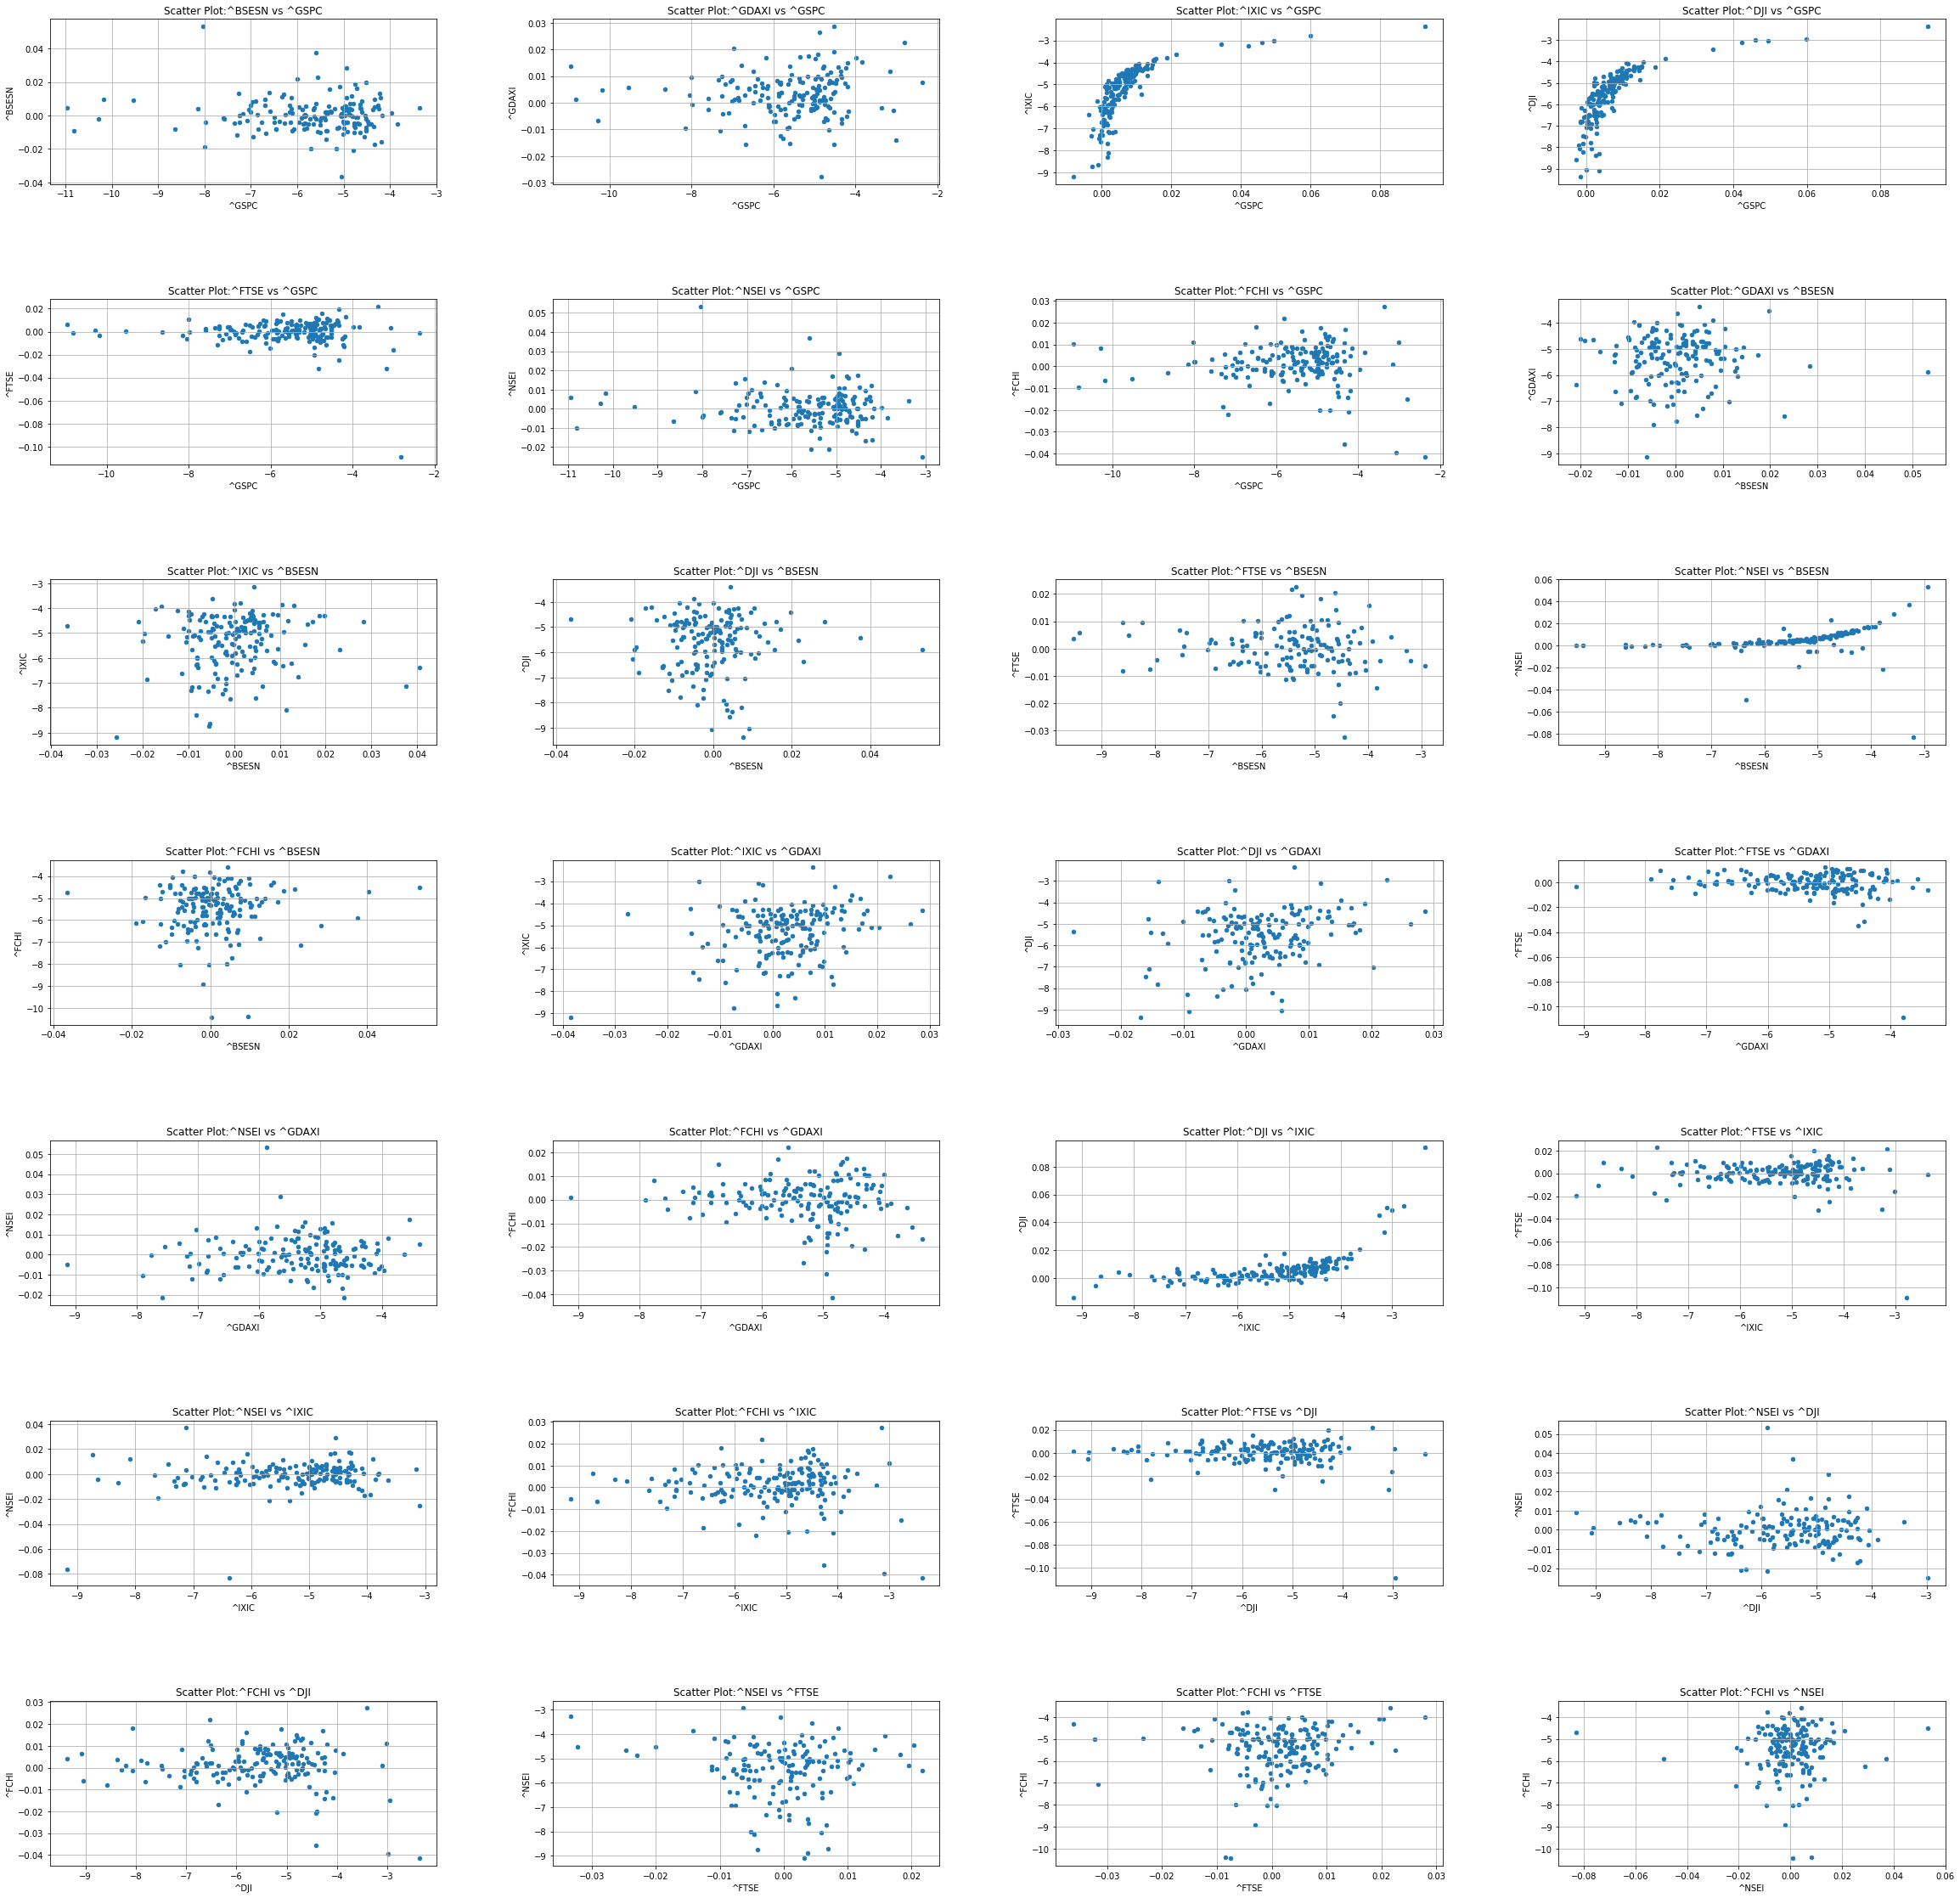

In [39]:
plot_scatter_conditional(index_comb, index_dict)

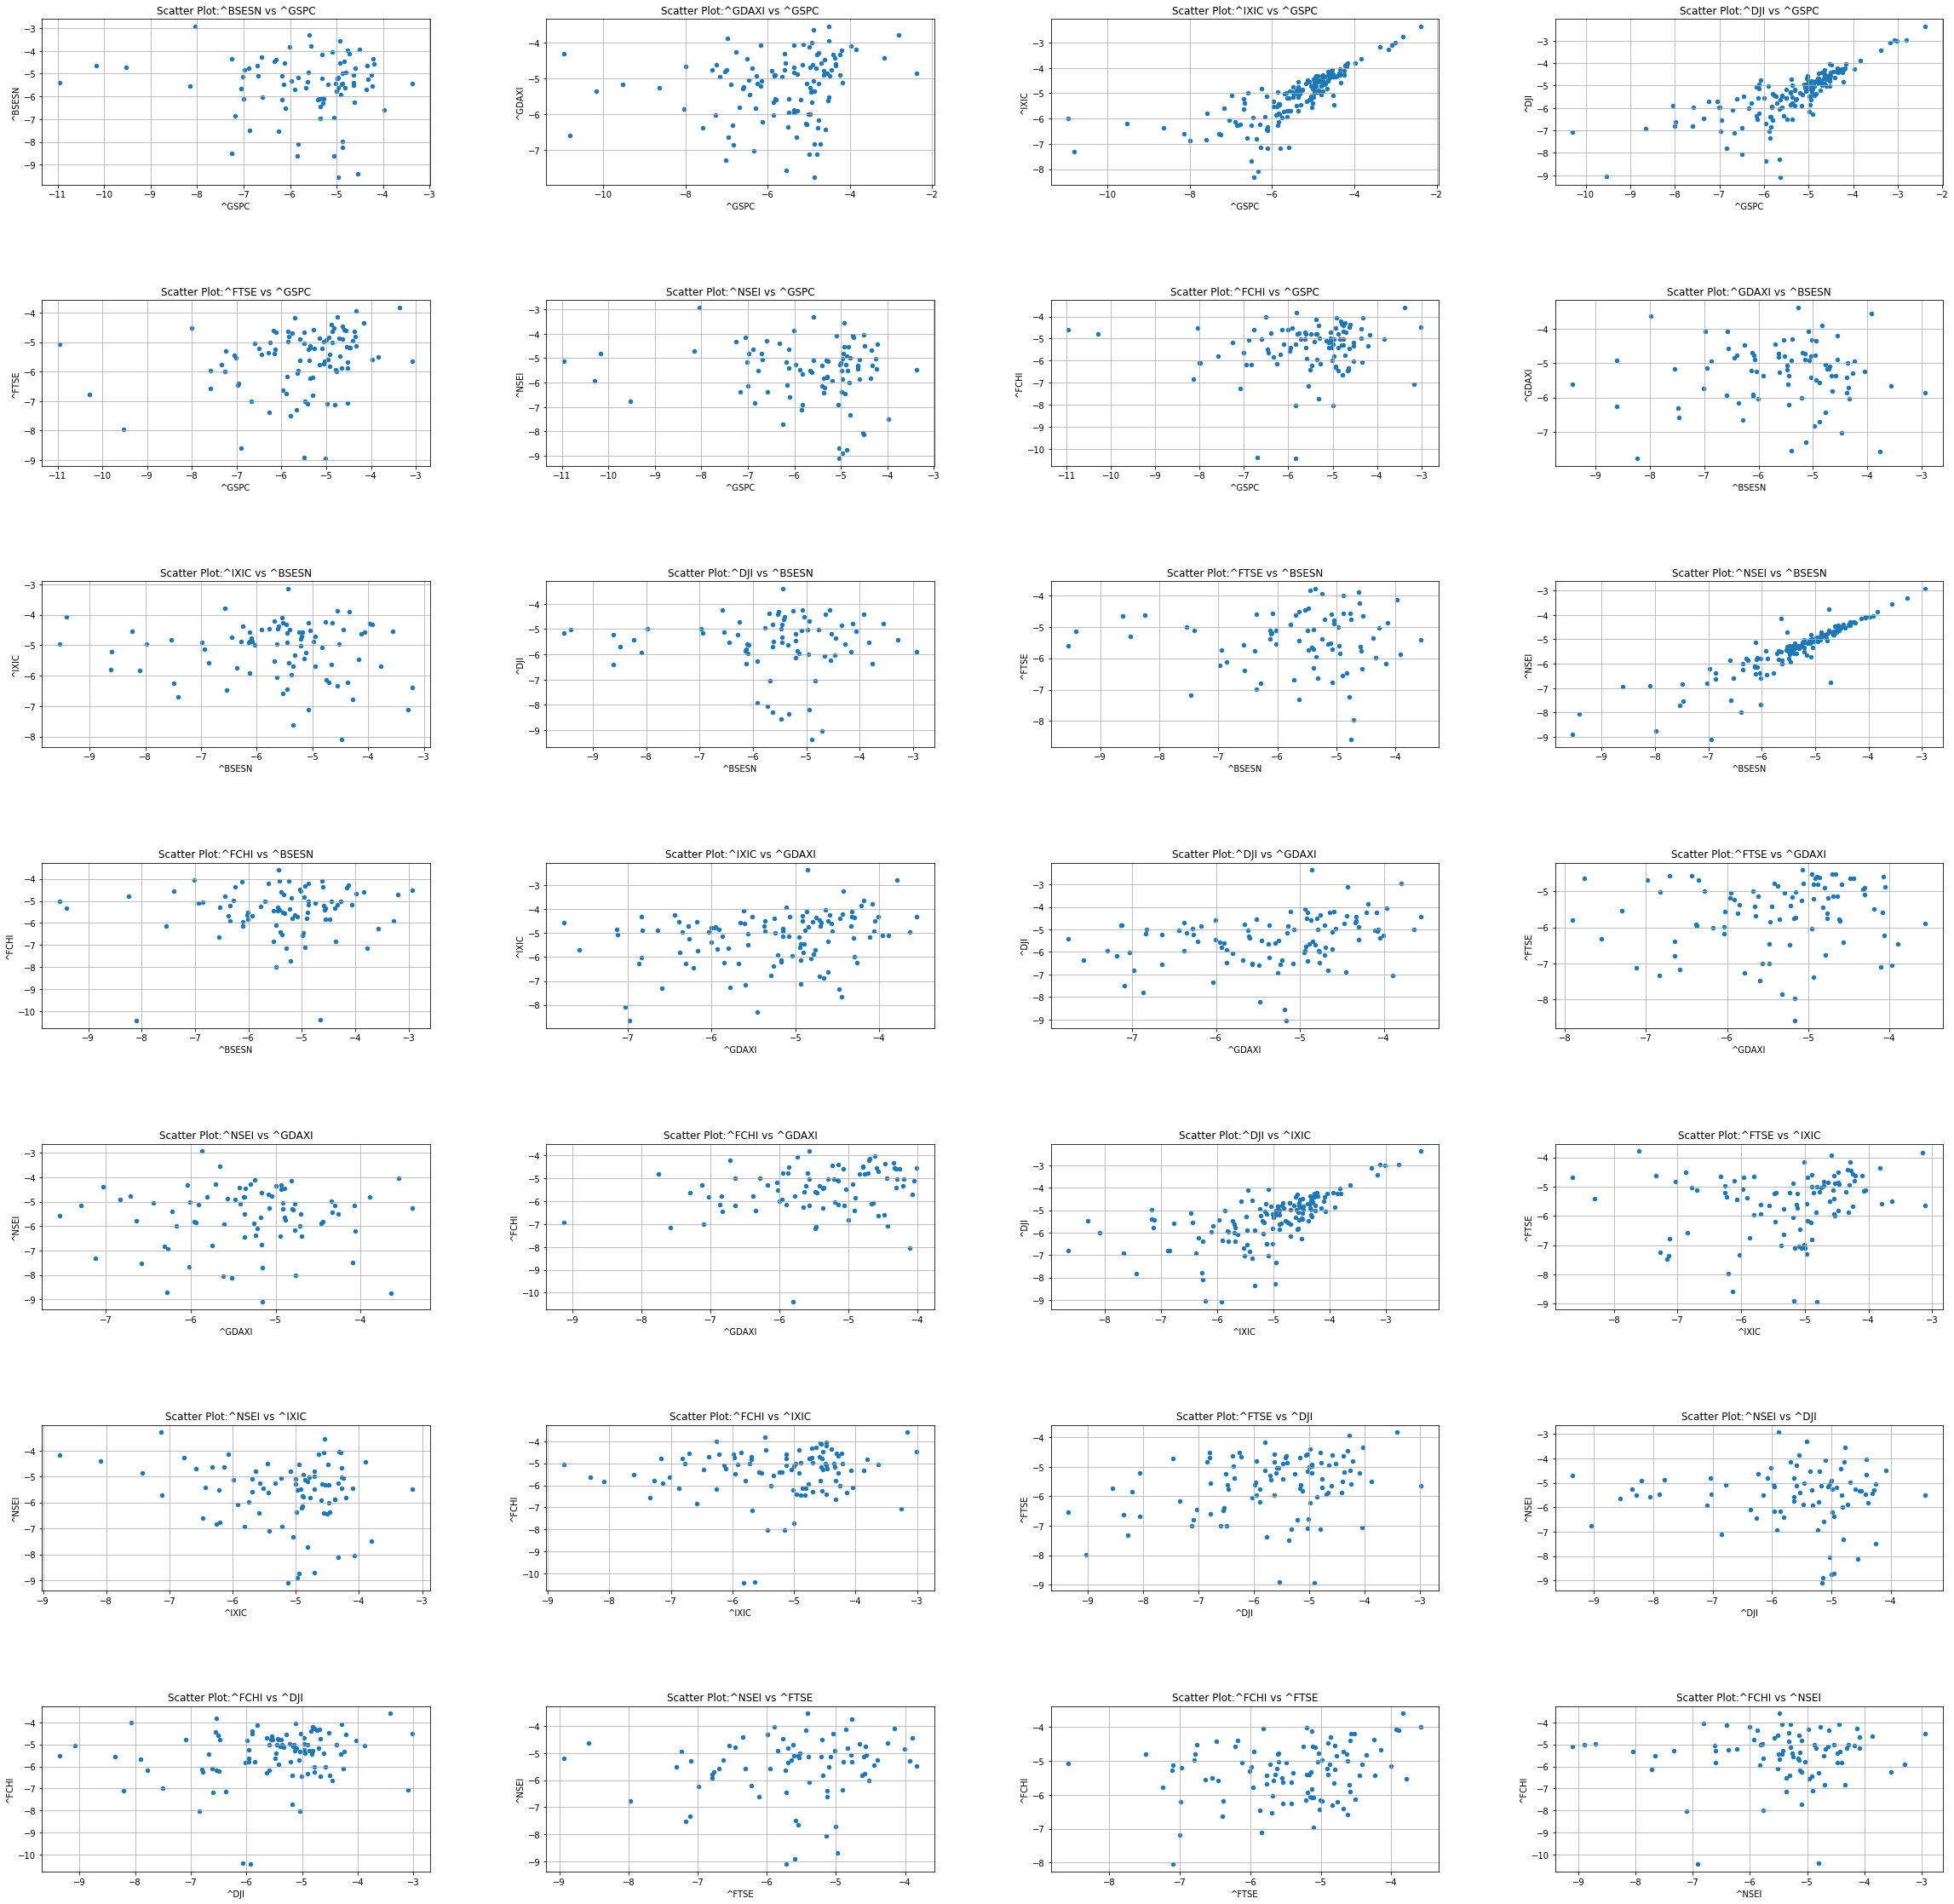

In [40]:
plot_scatter_conditional(index_comb, index_dict, log_plot='two')

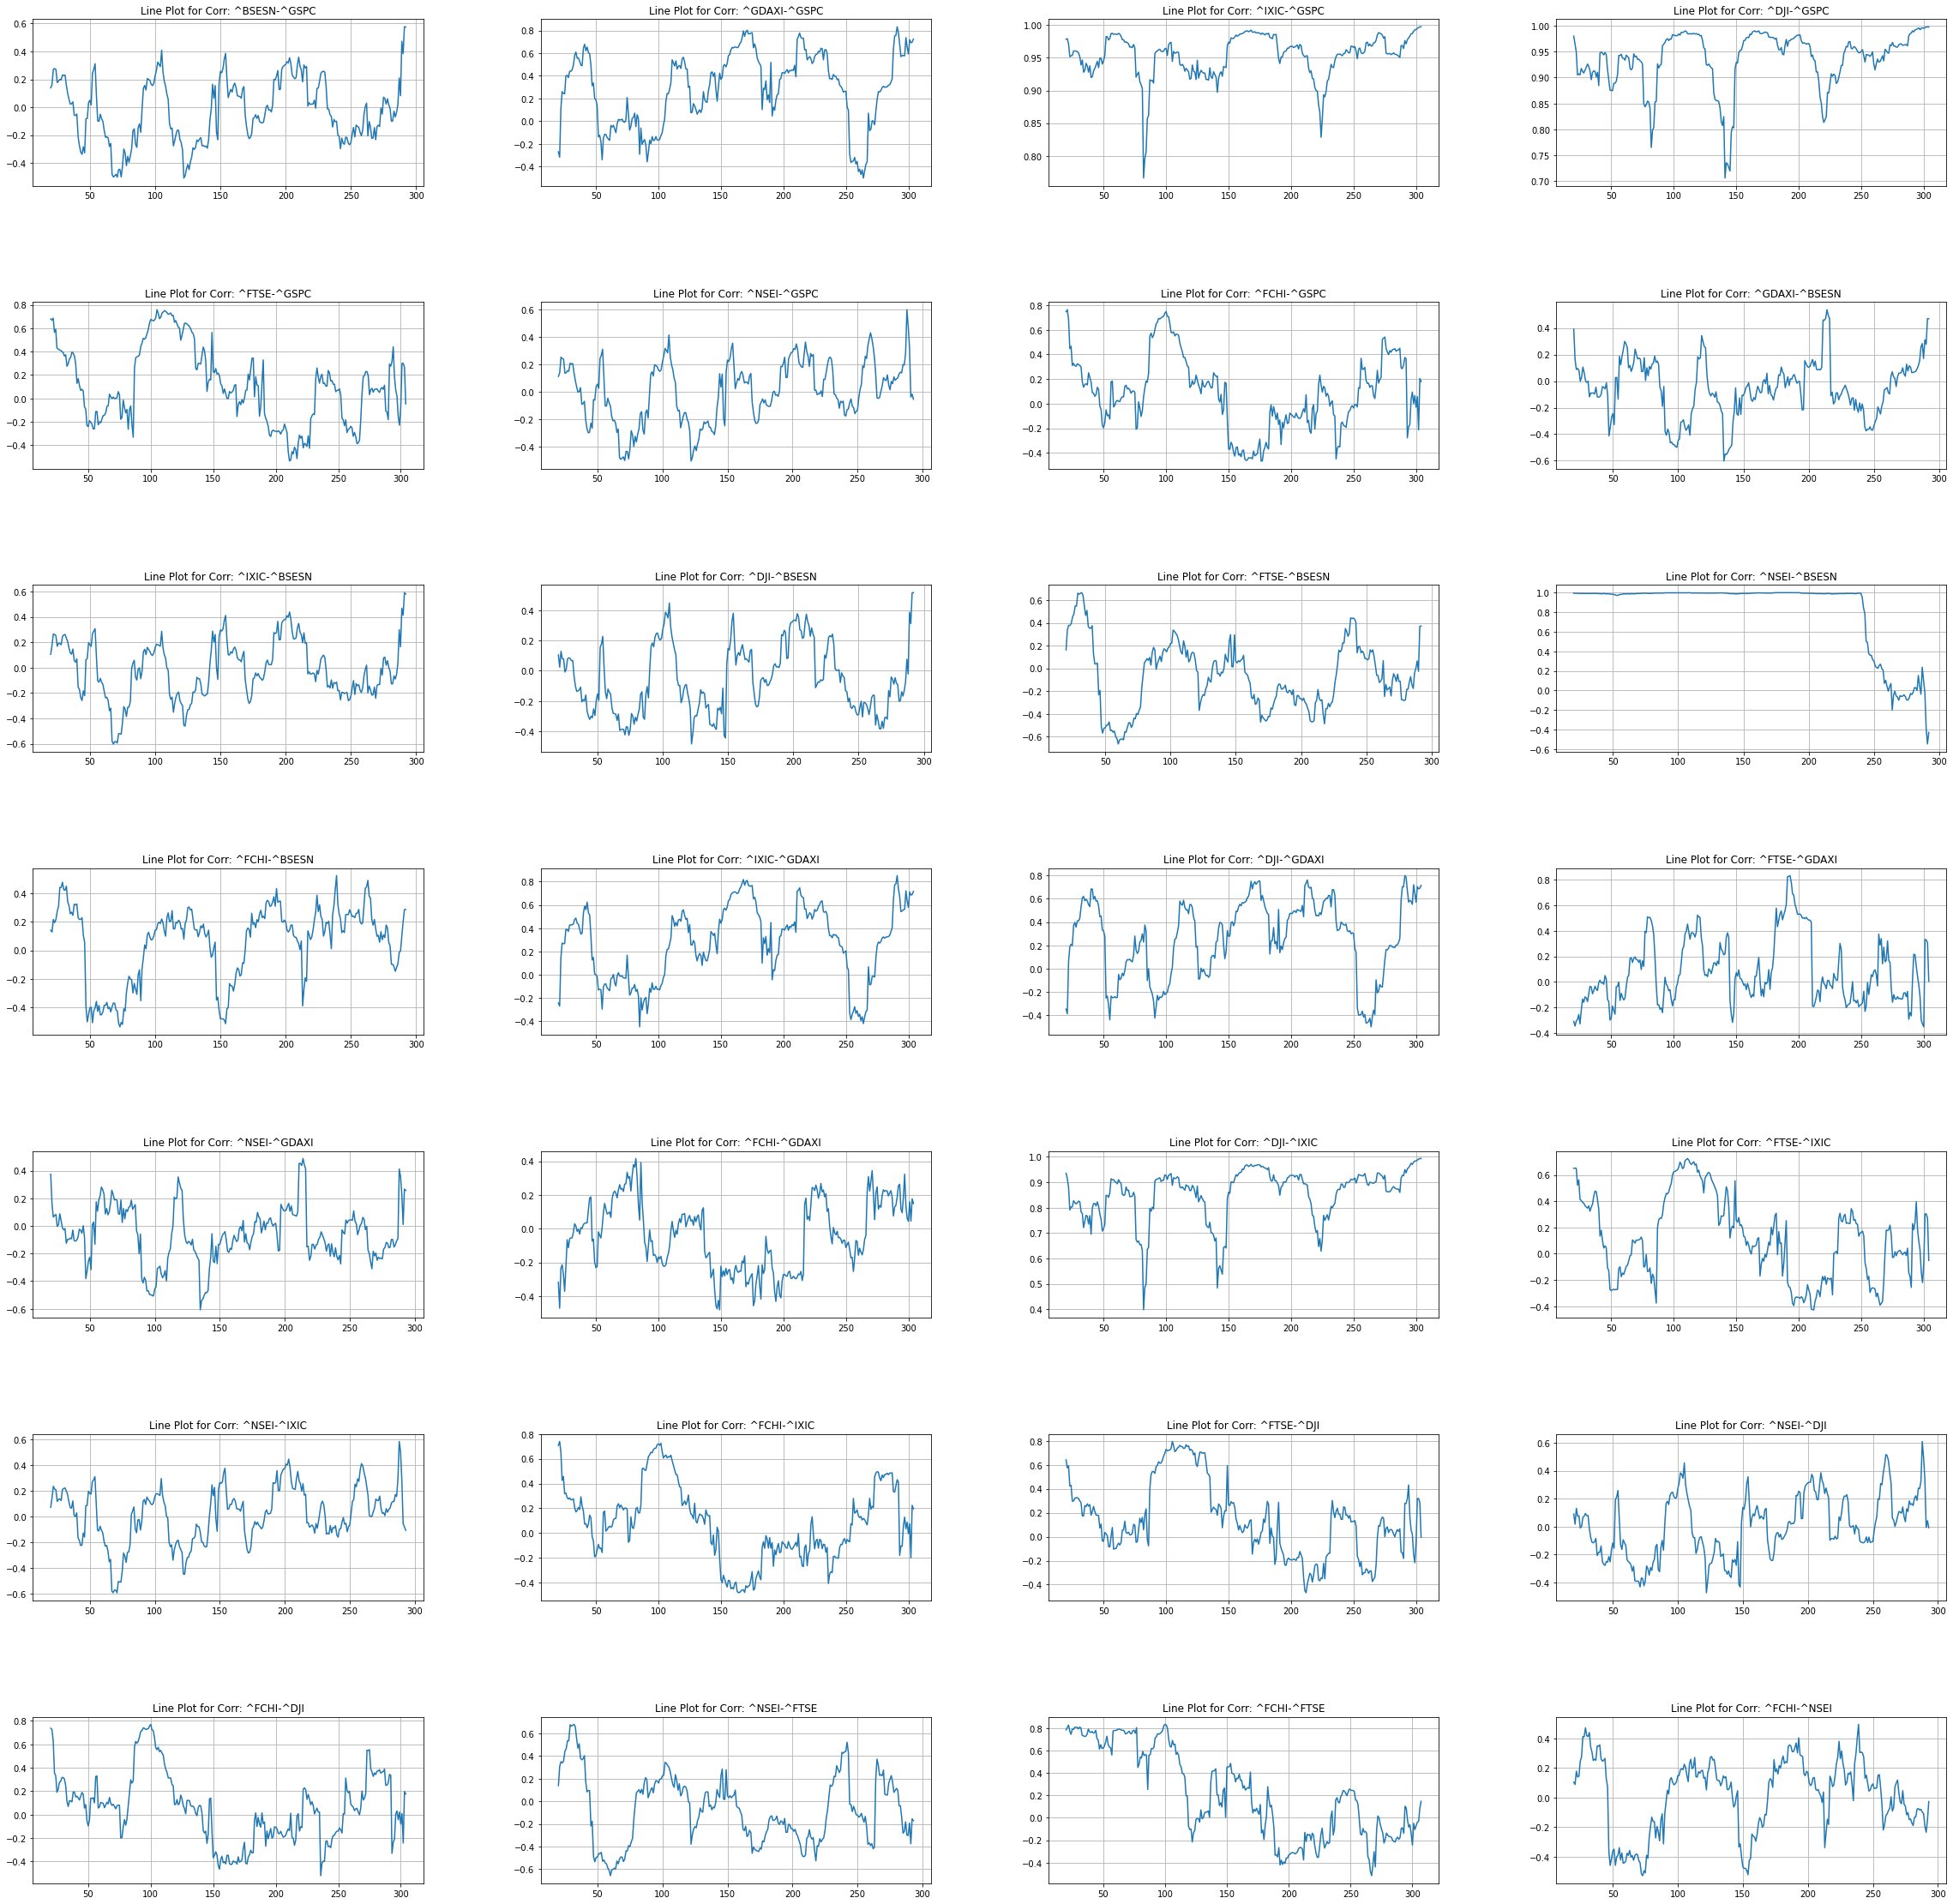

In [41]:
plot_corr(index_comb, index_dict)

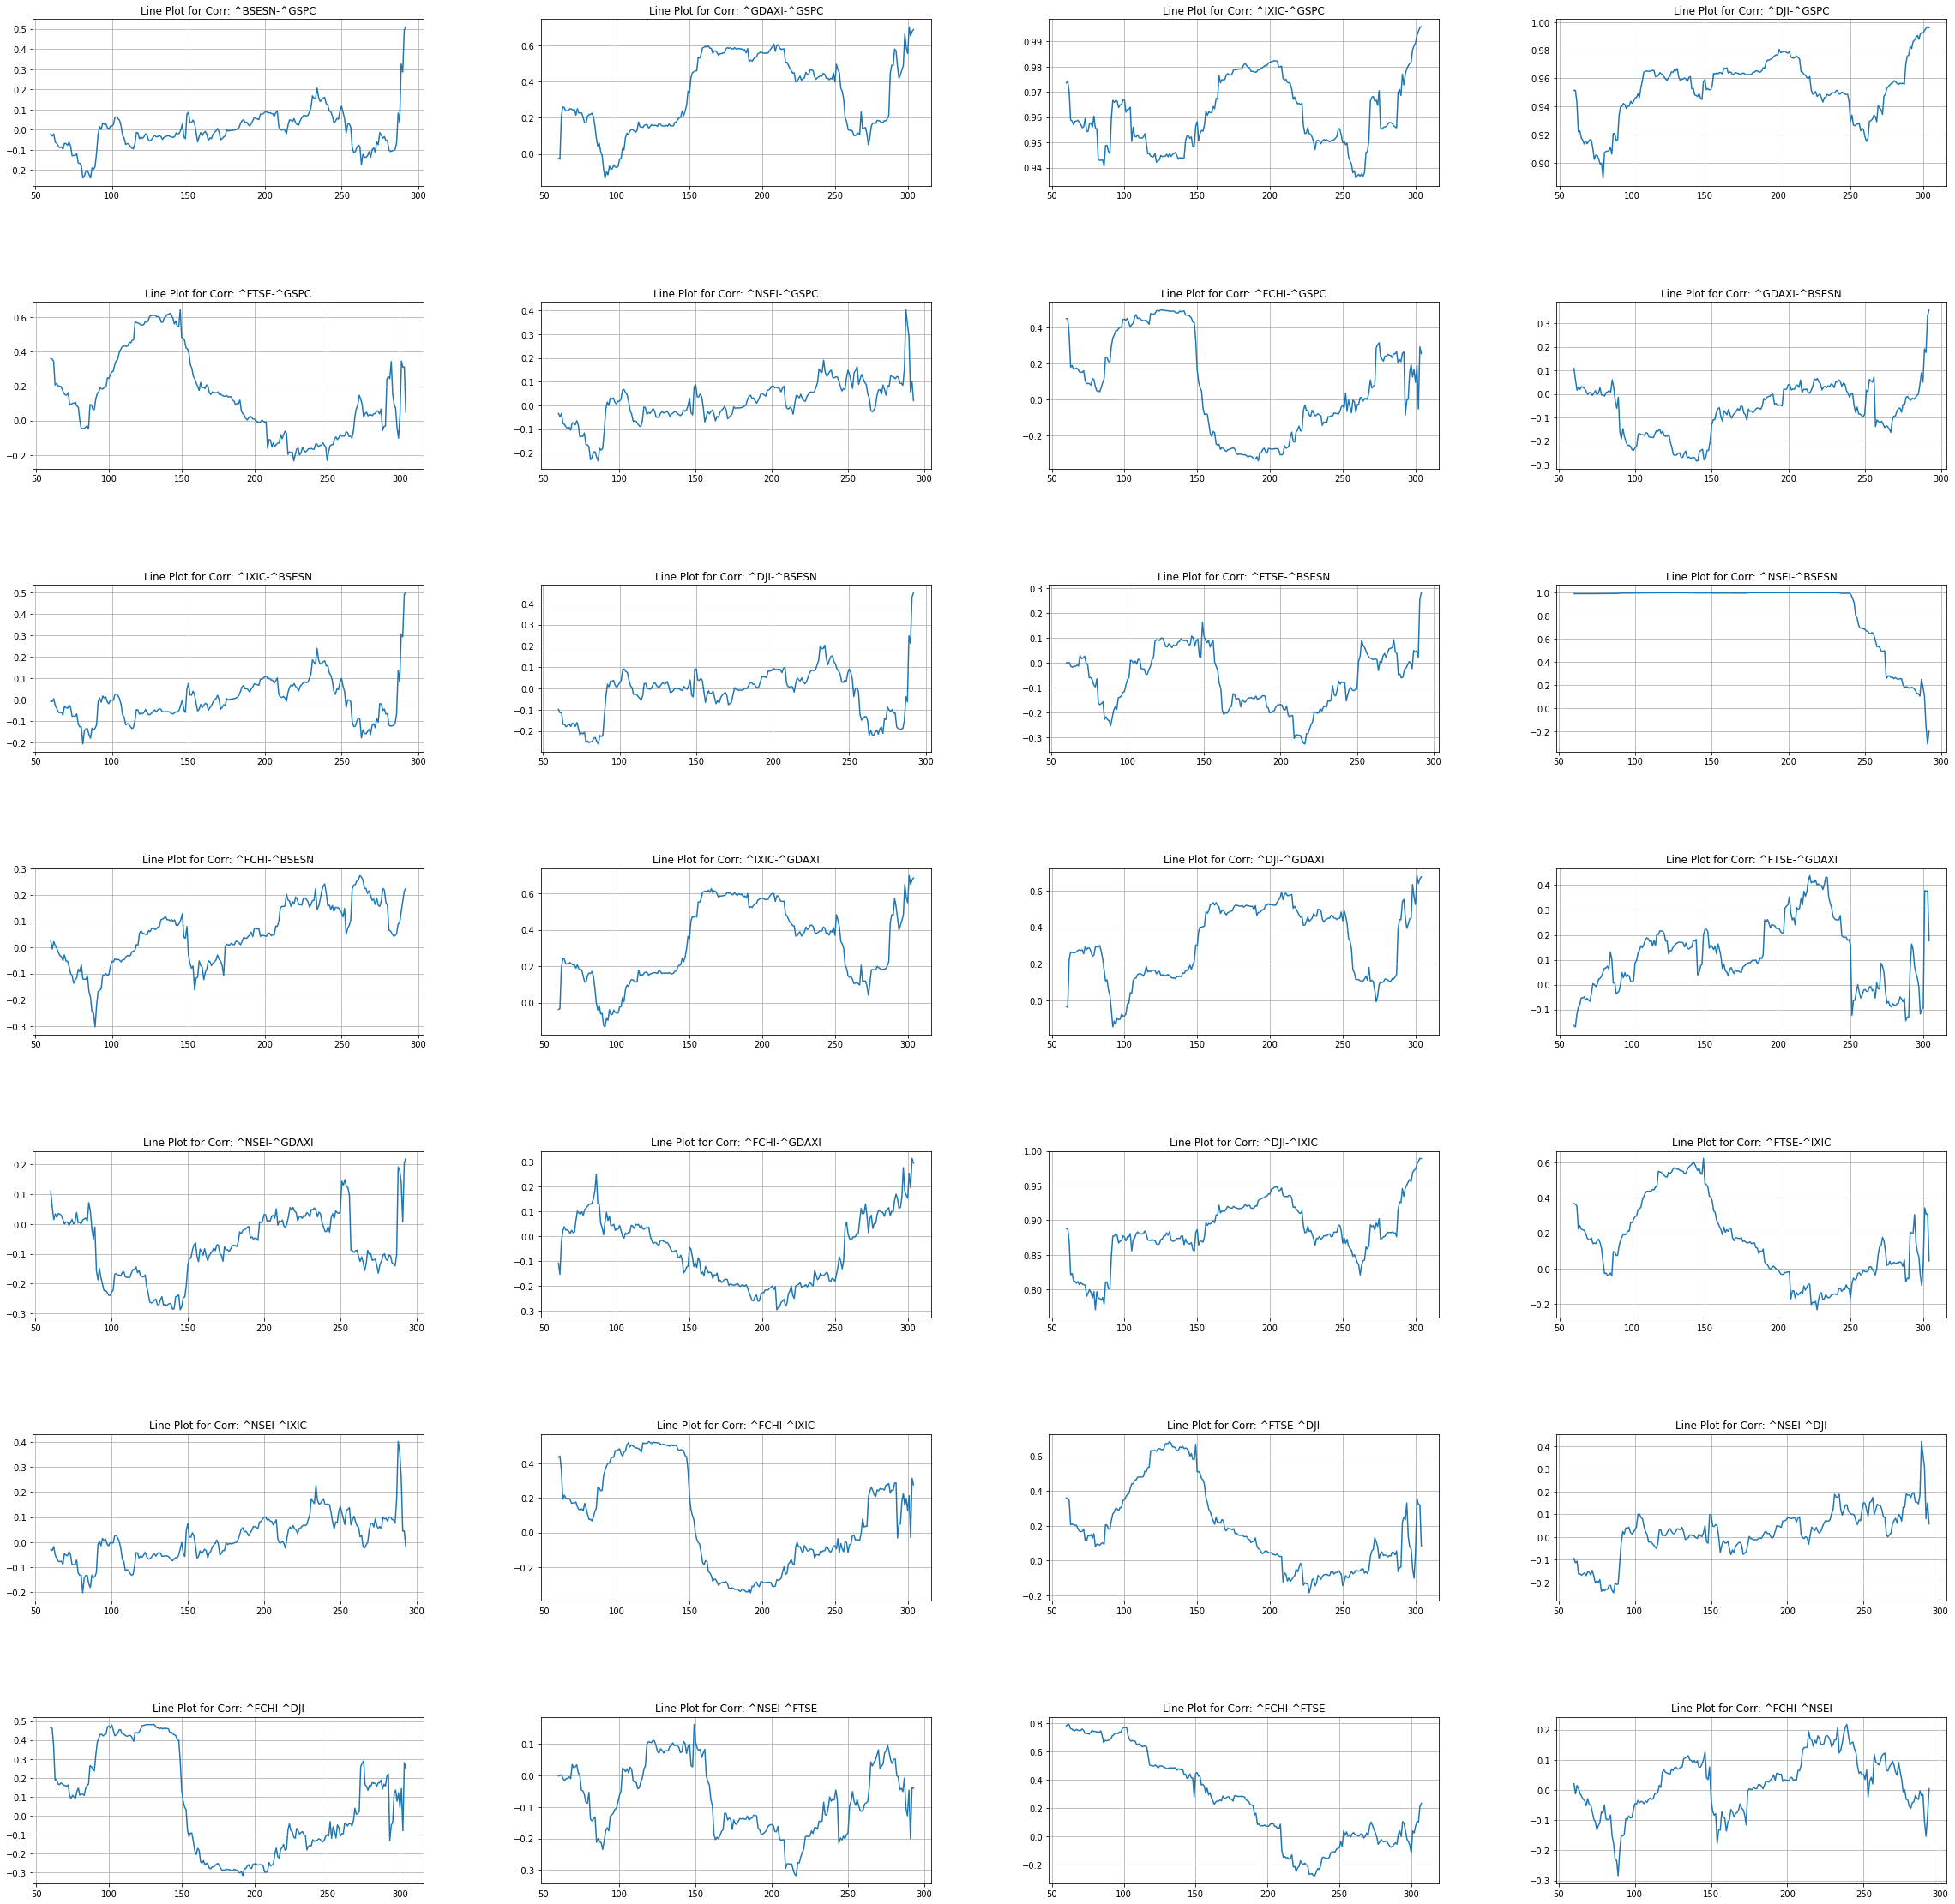

In [42]:
plot_corr(index_comb, index_dict,60)

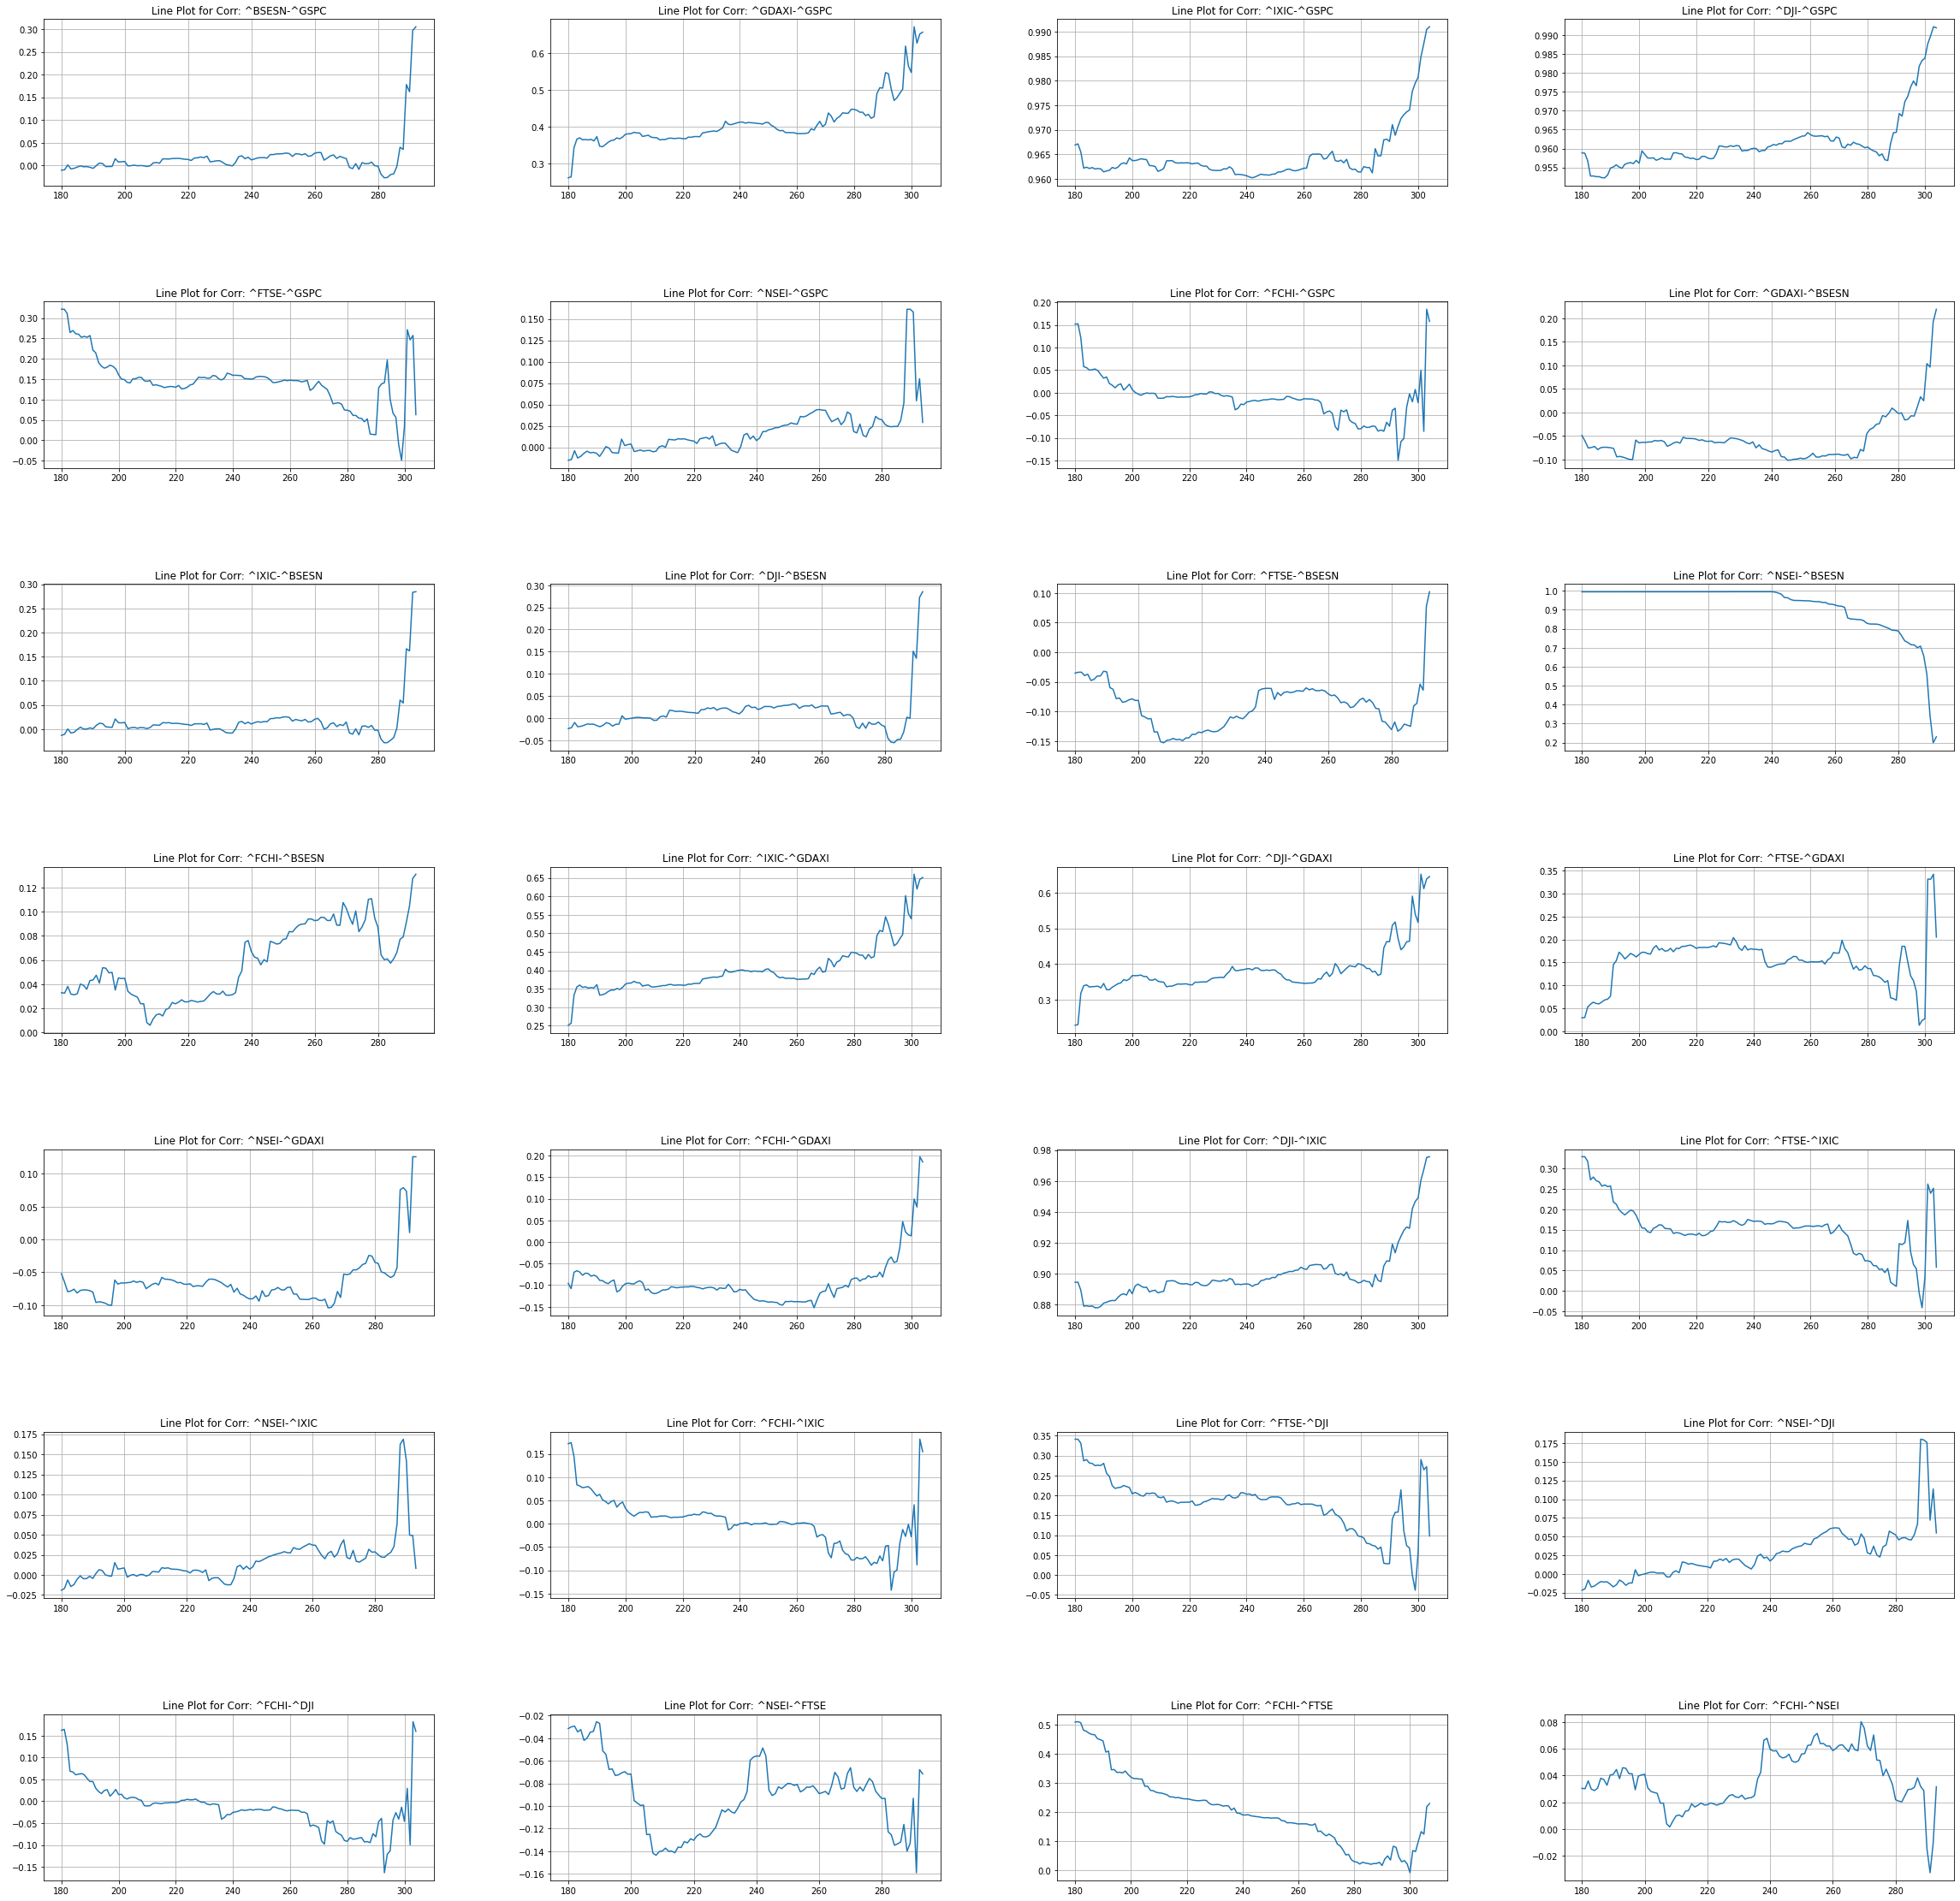

In [43]:
plot_corr(index_comb, index_dict,180)

In [ ]:
plot_corr_stats(index_comb, index_dict, windows, 'mean')

In [ ]:
plot_corr_stats(index_comb, index_dict, windows, 'std')